# Projekt
### Maksymilian Tabian 
--------------------------------

#### Wczytanie bibliotek i zbiorów danych
-----------------------------------------

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV, KFold, RepeatedKFold, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier

In [179]:
X_train = pd.read_csv("X_train.csv", index_col=0)
X_train = X_train.reset_index(drop = True)

In [180]:
y_train = pd.read_csv("y_train.csv", index_col = 0)
y_train = y_train.reset_index(drop = True)

In [181]:
X_test = pd.read_csv("X_test.csv", index_col=0)
X_test = X_test.reset_index(drop = True)

## 1. Wstępne przetwarzanie danych
------------------------------

#### 1.1. Informacje o zbiorach i usunięcie części braków danych.

In [182]:
# Informacje o zbiorze y_train
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RiskPerformance  3660 non-null   object
dtypes: object(1)
memory usage: 28.7+ KB


In [183]:
y_train.value_counts()

RiskPerformance
Bad                1924
Good               1736
Name: count, dtype: int64

`y` nie zawiera żadnych braków danych. Klasy Bad i Good w `y` są zbalansowane.

In [184]:
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,79,255,14,99,29,0,0,97,-8,6,...,67,-7,0,0,70,60,2,3,0,71
1,77,61,2,33,14,0,0,100,-7,7,...,7,21,0,0,27,-8,4,1,0,56
2,55,114,6,59,19,0,0,89,5,4,...,53,0,1,1,97,90,8,2,6,100
3,75,195,2,64,36,0,0,100,-7,7,...,29,-7,2,2,54,79,9,6,2,83
4,77,147,3,65,15,0,0,93,30,6,...,33,0,3,3,21,37,2,2,0,44


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>,
        <Axes: title={'center': 'X5'}>],
       [<Axes: title={'center': 'X6'}>, <Axes: title={'center': 'X7'}>,
        <Axes: title={'center': 'X8'}>, <Axes: title={'center': 'X9'}>,
        <Axes: title={'center': 'X10'}>],
       [<Axes: title={'center': 'X11'}>, <Axes: title={'center': 'X12'}>,
        <Axes: title={'center': 'X13'}>, <Axes: title={'center': 'X14'}>,
        <Axes: title={'center': 'X15'}>],
       [<Axes: title={'center': 'X16'}>, <Axes: title={'center': 'X17'}>,
        <Axes: title={'center': 'X18'}>, <Axes: title={'center': 'X19'}>,
        <Axes: title={'center': 'X20'}>],
       [<Axes: title={'center': 'X21'}>, <Axes: title={'center': 'X22'}>,
        <Axes: title={'center': 'X23'}>, <Axes: >, <Axes: >]],
      dtype=object)

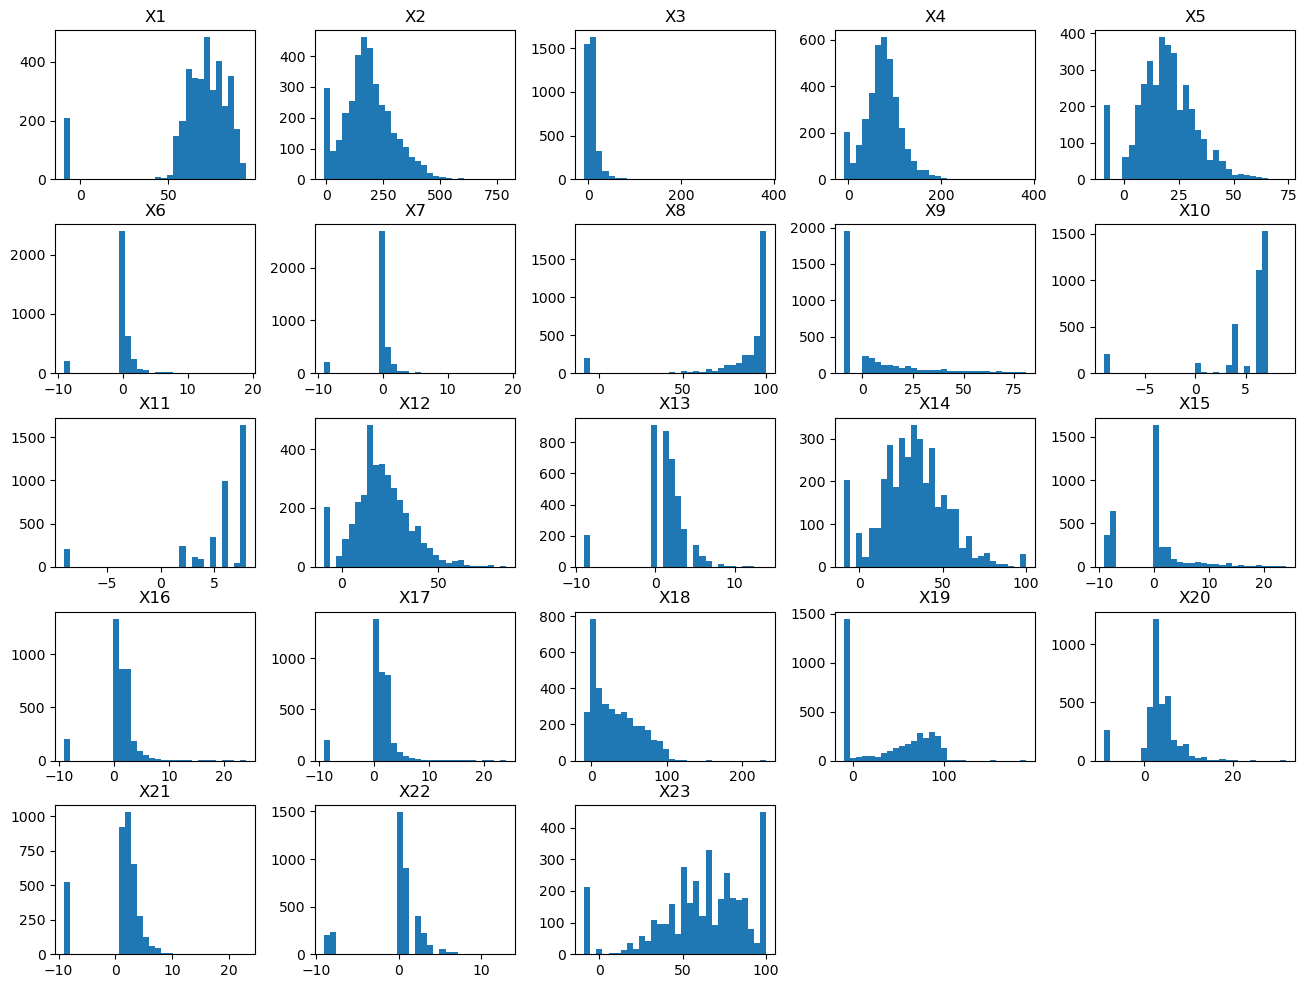

In [185]:
X_train.hist(bins = 30, figsize=(16, 12), grid=False)

Można zauważyć, że część kolumn w `X` zawiera braki danych, które przejawiają się ujemnymi wartościami.

In [186]:
# W X_train_copy zliczone zostaną braki danych w poszczególnych wierszach
X_train_copy = X_train.copy()

In [187]:
X_train_copy['nan_count'] = (X_train_copy < 0).sum(axis = 1)

In [188]:
X_train_copy

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,nan_count
0,79,255,14,99,29,0,0,97,-8,6,...,-7,0,0,70,60,2,3,0,71,2
1,77,61,2,33,14,0,0,100,-7,7,...,21,0,0,27,-8,4,1,0,56,2
2,55,114,6,59,19,0,0,89,5,4,...,0,1,1,97,90,8,2,6,100,0
3,75,195,2,64,36,0,0,100,-7,7,...,-7,2,2,54,79,9,6,2,83,2
4,77,147,3,65,15,0,0,93,30,6,...,0,3,3,21,37,2,2,0,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,23
3656,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,23
3657,62,161,1,60,16,1,0,79,4,4,...,0,1,1,20,25,4,2,0,47,0
3658,85,231,4,77,14,1,0,93,67,6,...,0,0,0,0,59,1,1,0,38,0


In [189]:
X_train_copy.nan_count.value_counts()

nan_count
1     1351
0      832
2      817
3      322
23     203
4      100
5       19
7        6
6        6
8        3
9        1
Name: count, dtype: int64

Można zauważyć, że aż 203 wiersze są bezużyteczne, ponieważ zawierają wyłącznie braki danych. Te wiersze zostaną usunięte. Dodatkowo 16 wierszy zawiera więcej niż 5 braków danych. Te wiersze również usuwam. Wszystkie pozostałe braki danych zostaną uzupełnione w dalszych krokach.

In [190]:
# useful_rows - wiersze zawierające nie więcej niż 5 braków danych
useful_rows = X_train_copy[X_train_copy['nan_count'] <= 5].index

In [191]:
# ograniczenie X_train i y_train tylko do useful_rows 
X_train = X_train.iloc[useful_rows]
y_train = y_train.iloc[useful_rows]

In [192]:
X_train.shape, y_train.shape

((3441, 23), (3441, 1))

In [193]:
# Po usunięciu braków danych klasy są jeszcze lepiej zbalansowane.
y_train.value_counts()

RiskPerformance
Bad                1791
Good               1650
Name: count, dtype: int64

In [194]:
# Zamiana klas w 'y' na klasy binarne 0 i 1: Bad -> 1, Good -> 0
y_train['RiskPerformanceBin'] = y_train['RiskPerformance'].map({'Bad': 1, 'Good': 0})
y_train = y_train.RiskPerformanceBin

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>,
        <Axes: title={'center': 'X5'}>],
       [<Axes: title={'center': 'X6'}>, <Axes: title={'center': 'X7'}>,
        <Axes: title={'center': 'X8'}>, <Axes: title={'center': 'X9'}>,
        <Axes: title={'center': 'X10'}>],
       [<Axes: title={'center': 'X11'}>, <Axes: title={'center': 'X12'}>,
        <Axes: title={'center': 'X13'}>, <Axes: title={'center': 'X14'}>,
        <Axes: title={'center': 'X15'}>],
       [<Axes: title={'center': 'X16'}>, <Axes: title={'center': 'X17'}>,
        <Axes: title={'center': 'X18'}>, <Axes: title={'center': 'X19'}>,
        <Axes: title={'center': 'X20'}>],
       [<Axes: title={'center': 'X21'}>, <Axes: title={'center': 'X22'}>,
        <Axes: title={'center': 'X23'}>, <Axes: >, <Axes: >]],
      dtype=object)

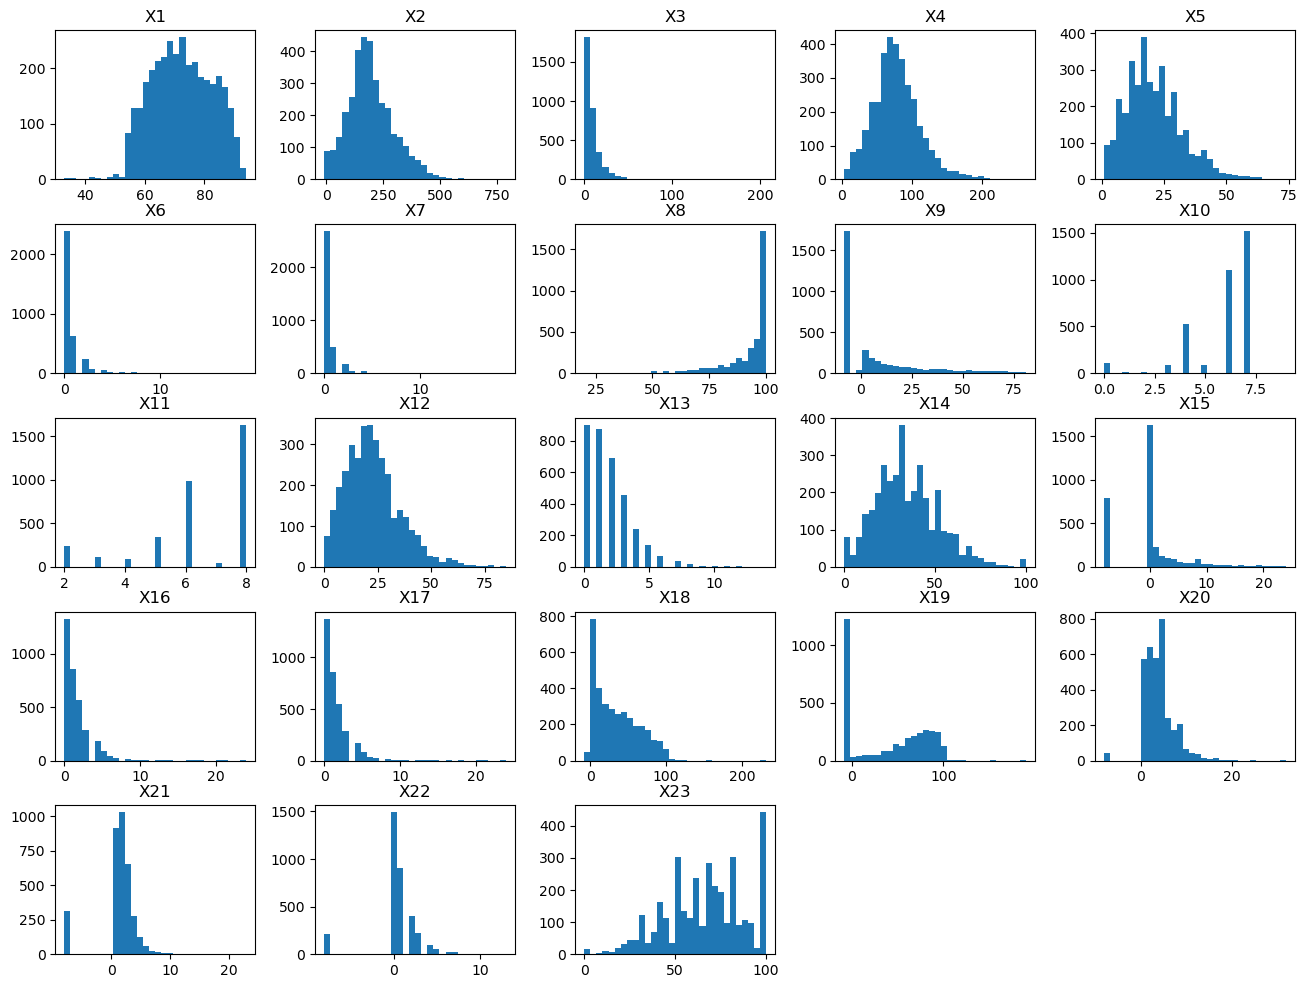

In [195]:
X_train.hist(bins = 30, figsize=(16, 12), grid=False)

In [196]:
# Częśc kolumn zawiera wciąż ujemne wartości. Zamieniam ujemnych wartości w X na Nan
X_train[X_train < 0] = np.nan

#### 1.2. Wstępna selekcja zmiennych

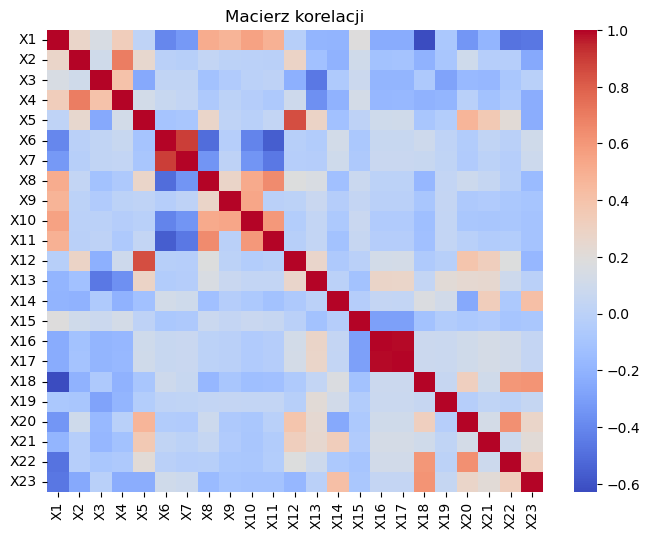

In [147]:
# Macierz korelacji zmiennych w X
correlation_matrix = X_train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji")
plt.show()

Można zauważyć, że dwie kolumny `X16` i `X17` mają korelację bliską 1. Dlatego usuwam jedną z kolumn - `X17` (opis kolumn pozwala na to - wartości w nich mogą się różnić jedynie w skrajnych przypadkach).

In [197]:
X_train = X_train.drop(columns='X17')

Dodatkowo kolumny `X6` i `X7` również mają korelację bliską 1. 
(`X6` - liczba kont, na których zalegano z płatności co najmniej 60 dni, a `X7` - liczba kont, na których zalegano z płatności co najmniej 90 dni)  
Rozważę teraz usunięcie jednej z nich - kolumny `X7`. 

1. Najpierw sprawdzam jakość modeli bez usunięcia zmiennej `X7`.

Eksperyment przeprowadzam na kilku modelach z domyślnymi wartościami hiperparametrów - regresja liniowa, regresja liniowa z regularyzacją L1 i L2, LDA, QDA, KNN, NaiveBayes, RandomForest oraz ExtraTrees.

Ponieważ w pewnych kolumnach występują braki danych - uzupełniam je za pomocą `SimpleImputer` ale ze `strategy = median`, ponieważ rozkłady powyższych zmiennych są raczej skośne (z wyjątkiem `X2`, ale zawiera on niewiele braków danych). Pozwoli to dodatkowo ograniczyć wpływ outlierów na jakość modeli. Stosuję również skalowanie zmiennych za pomocą `StandardScaler`.

In [264]:
# Do oceny jakości modeli stosuje miarę 'balanced_accuracy' wyznaczoną za pomocą kroswalidacji z liczbą foldów = 5
# Dla reprodukowalności wyników ustawiam parametr random state

models = [
    ('LM', LogisticRegression(penalty = None, max_iter=10000, random_state= 47)),
    ('LM_l1', LogisticRegression(penalty= 'l1', solver= 'liblinear', max_iter= 10000, random_state= 47)),
    ('LM_l2', LogisticRegression(penalty='l2', max_iter= 10000, random_state= 47)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('NB', BernoulliNB()),
    ('RandomForest', RandomForestClassifier(random_state= 47)),
    ('ExtraTrees', ExtraTreesClassifier(random_state= 47))
]

results = {}
cv = KFold(n_splits=5, shuffle=True, random_state=47)

for name, model in models:
    pipeline = Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv = cv, scoring='balanced_accuracy')
    results[name] = scores

for name, scores in results.items():
    print(f"{name}: balanced accuracy = {scores.mean():.4f}, std = {scores.std():.4f}")

LM: balanced accuracy = 0.7339, std = 0.0095
LM_l1: balanced accuracy = 0.7342, std = 0.0103
LM_l2: balanced accuracy = 0.7336, std = 0.0097
LDA: balanced accuracy = 0.7346, std = 0.0111
QDA: balanced accuracy = 0.6995, std = 0.0063
KNN: balanced accuracy = 0.6866, std = 0.0157
NB: balanced accuracy = 0.7123, std = 0.0152
RandomForest: balanced accuracy = 0.7230, std = 0.0152
ExtraTrees: balanced accuracy = 0.7257, std = 0.0138


2. Teraz sprawdzam jak na jakość modeli wpłynie usunięcie kolumny `X7`

In [265]:
# X_train_copy to zbiór X_train z usuniętą kolumną X7 dla celów testowych
X_train_copy = X_train.drop(columns='X7')

models = [
    ('LM', LogisticRegression(penalty = None, max_iter=10000, random_state=47)),
    ('LM_l1', LogisticRegression(penalty= 'l1', solver= 'liblinear', max_iter= 10000, random_state=47)),
    ('LM_l2', LogisticRegression(penalty='l2', max_iter= 10000, random_state=47)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('NB', BernoulliNB()),
    ('RandomForest', RandomForestClassifier(random_state=47)),
    ('ExtraTrees', ExtraTreesClassifier(random_state=47))
]

results = {}
cv = KFold(n_splits=5, shuffle=True, random_state=47)

for name, model in models:
    pipeline = Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_train_copy, y_train, cv= cv, scoring='balanced_accuracy')
    results[name] = scores

for name, scores in results.items():
    print(f"{name}: balanced accuracy = {scores.mean():.4f}, std = {scores.std():.4f}")

LM: balanced accuracy = 0.7339, std = 0.0098
LM_l1: balanced accuracy = 0.7345, std = 0.0101
LM_l2: balanced accuracy = 0.7339, std = 0.0098
LDA: balanced accuracy = 0.7351, std = 0.0104
QDA: balanced accuracy = 0.7080, std = 0.0041
KNN: balanced accuracy = 0.6861, std = 0.0159
NB: balanced accuracy = 0.7184, std = 0.0173
RandomForest: balanced accuracy = 0.7264, std = 0.0086
ExtraTrees: balanced accuracy = 0.7272, std = 0.0085


Zauważalna jest pewna poprawa dokładności w większości modeli po usunięciu kolumny `X7` - dlatego usuwam ją.

In [198]:
# Usunięcie kolumny X7
X_train = X_train.drop(columns='X7')

In [199]:
X_train.head()

,X1,X2,X3,X4,X5,X6,X8,X9,X10,X11,...,X13,X14,X15,X16,X18,X19,X20,X21,X22,X23
0,79,255.0,14,99,29,0,97,NaN,6,6,...,0,67,NaN,0,70.0,60.0,2.0,3.0,0.0,71
1,77,61.0,2,33,14,0,100,NaN,7,8,...,1,7,21.0,0,27.0,NaN,4.0,1.0,0.0,56
2,55,114.0,6,59,19,0,89,5.0,4,6,...,1,53,0.0,1,97.0,90.0,8.0,2.0,6.0,100
3,75,195.0,2,64,36,0,100,NaN,7,8,...,5,29,NaN,2,54.0,79.0,9.0,6.0,2.0,83
4,77,147.0,3,65,15,0,93,30.0,6,6,...,2,33,0.0,3,21.0,37.0,2.0,2.0,0.0,44


#### 1.3. Kolumny z brakami danych

Przyjrzę się teraz po kolei kolumnom zawierającym braki danych

In [200]:
X_train.isna().sum()

X1        0
X2       69
X3        0
X4        0
X5        0
X6        0
X8        0
X9     1737
X10       0
X11       0
X12       0
X13       0
X14       0
X15     794
X16       0
X18      49
X19    1229
X20      40
X21     310
X22     218
X23       0
dtype: int64

- `X2` - Ile miesięcy minęło od otwarcia najstarszego konta.
- `X9` - Ile miesięcy minęło od ostatniego opóźnienia w płatnościach.
- `X15` - Ile miesięcy minęło od ostatniego zapytania o kredyt (bez zapytań z ostatnich 7 dni)
- `X18` - Procent wykorzystania dostępnego limitu na kontach obrotowych (saldo podzielone przez limit kredytowy).
- `X19` - Procent spłaty kredytów ratalnych (saldo podzielone przez początkową kwotę pożyczki)
- `X20` - Liczba kont obrotowych z niespłaconym saldem.
- `X21` - Liczba kont ratalnych z niespłaconym saldem.
- `X22` - Liczba kont bankowych/krajowych z wysokim wskaźnikiem wykorzystania limitu.

Kolumny `X9`, `X15`, `X19` zawierają znaczące liczby braków danych. Sprawdzę, jak na jakość modeli wpłynie dodanie do ramki danych dodatkowych kolumn, które będą przyjmowały wartość 1 jeśli w kolumnnach tych jest wartość `Nan` i 0 wpp.\
(przeprowadzenie eksperymentów na różnych kombinacjach kolumn`X9`, `X15`, `X19` pokazało, że dodanie wyłącznie dodatkowej kolumny odpowiadającej zmiennej `X9` przynosi poprawę jakości modeli).

In [201]:
# Dodanie dodatkowej kolumny do X_train_copy na potrzeby testów
X_train_copy = X_train.copy()

# tutaj rozważałem różne kombinacje tych trzech kolumn - najskuteczniejsze okazało się dodanie kolumny odpowiadającej X9
for col in ['X9']:
    X_train_copy[f'{col}_missing'] = X_train_copy[col].isna().astype(int)

In [202]:
X_train_copy.head()

,X1,X2,X3,X4,X5,X6,X8,X9,X10,X11,...,X14,X15,X16,X18,X19,X20,X21,X22,X23,X9_missing
0,79,255.0,14,99,29,0,97,NaN,6,6,...,67,NaN,0,70.0,60.0,2.0,3.0,0.0,71,1
1,77,61.0,2,33,14,0,100,NaN,7,8,...,7,21.0,0,27.0,NaN,4.0,1.0,0.0,56,1
2,55,114.0,6,59,19,0,89,5.0,4,6,...,53,0.0,1,97.0,90.0,8.0,2.0,6.0,100,0
3,75,195.0,2,64,36,0,100,NaN,7,8,...,29,NaN,2,54.0,79.0,9.0,6.0,2.0,83,1
4,77,147.0,3,65,15,0,93,30.0,6,6,...,33,0.0,3,21.0,37.0,2.0,2.0,0.0,44,0


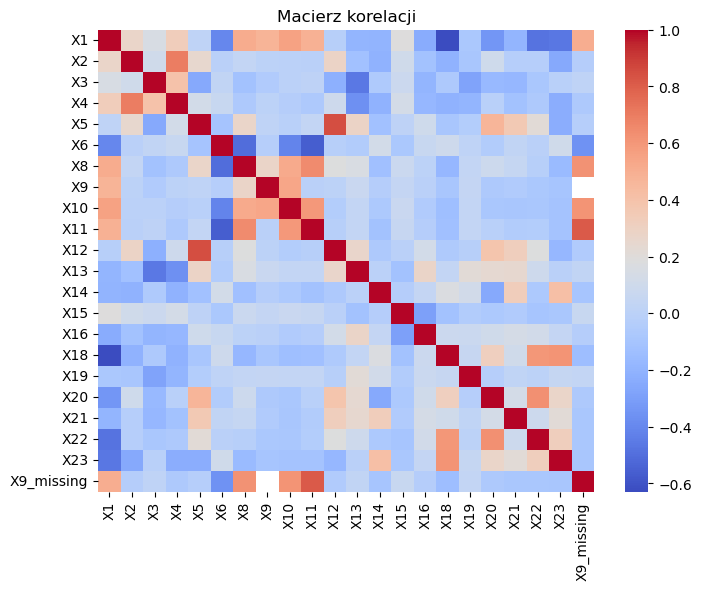

In [271]:
# Zaktualizowana mapa korelacji 
correlation_matrix = X_train_copy.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji")
plt.show()

In [272]:
# Eksperyment pokazujący jak zmieni się jakość modeli po dodaniu dodatkowych kolumn
models = [
    ('LM', LogisticRegression(penalty = None, max_iter=10000, random_state=47)),
    ('LM_l1', LogisticRegression(penalty= 'l1', solver= 'liblinear', max_iter= 10000, random_state= 47)),
    ('LM_l2', LogisticRegression(penalty='l2', max_iter= 10000, random_state= 47)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('NB', BernoulliNB()),
    ('RandomForest', RandomForestClassifier(random_state=47)),
    ('ExtraTrees', ExtraTreesClassifier(random_state=47))
]

results2 = {}
cv = KFold(n_splits=5, shuffle=True, random_state=47)

for name, model in models:
    pipeline = Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, X_train_copy, y_train, cv= cv, scoring='balanced_accuracy')
    results2[name] = scores

for name, scores in results2.items():
    print(f"{name}: balanced accuracy = {scores.mean():.4f}, std = {scores.std():.4f}")

LM: balanced accuracy = 0.7366, std = 0.0107
LM_l1: balanced accuracy = 0.7360, std = 0.0114
LM_l2: balanced accuracy = 0.7369, std = 0.0109
LDA: balanced accuracy = 0.7334, std = 0.0086
QDA: balanced accuracy = 0.7009, std = 0.0038
KNN: balanced accuracy = 0.6863, std = 0.0134
NB: balanced accuracy = 0.7123, std = 0.0163
RandomForest: balanced accuracy = 0.7309, std = 0.0114
ExtraTrees: balanced accuracy = 0.7276, std = 0.0097


Po dodaniu dodatkowej kolumny `X9_missing` poprawiła się jakość modeli, dlatego dodaję tą kolumnę.

In [203]:
X_train['X9_missing'] = X_train['X9'].isna().astype(int)
X_train.head()

,X1,X2,X3,X4,X5,X6,X8,X9,X10,X11,...,X14,X15,X16,X18,X19,X20,X21,X22,X23,X9_missing
0,79,255.0,14,99,29,0,97,NaN,6,6,...,67,NaN,0,70.0,60.0,2.0,3.0,0.0,71,1
1,77,61.0,2,33,14,0,100,NaN,7,8,...,7,21.0,0,27.0,NaN,4.0,1.0,0.0,56,1
2,55,114.0,6,59,19,0,89,5.0,4,6,...,53,0.0,1,97.0,90.0,8.0,2.0,6.0,100,0
3,75,195.0,2,64,36,0,100,NaN,7,8,...,29,NaN,2,54.0,79.0,9.0,6.0,2.0,83,1
4,77,147.0,3,65,15,0,93,30.0,6,6,...,33,0.0,3,21.0,37.0,2.0,2.0,0.0,44,0


Kolumna `X19` zawiera wiele braków danych, a jej korelacja ze zmienną `X1` oznaczającą zbiorczą ocenę wskaźników ryzyka jest niska. Rozważę usunięcie tej kolumny. 

In [274]:
# Eksperyment sprawdzający jak zmieni się jakość modeli po usunięciu kolumny X19
X_train_copy = X_train.drop(columns='X19')

models = [
    ('LM', LogisticRegression(penalty = None, max_iter=10000, random_state=47)),
    ('LM_l1', LogisticRegression(penalty= 'l1', solver= 'liblinear', max_iter= 10000, random_state=47)),
    ('LM_l2', LogisticRegression(penalty='l2', max_iter= 10000, random_state=47)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('NB', BernoulliNB()),
    ('RandomForest', RandomForestClassifier(random_state=47)),
    ('ExtraTrees', ExtraTreesClassifier(random_state=47))
]

results = {}
cv = KFold(n_splits=5, shuffle=True, random_state=47)

for name, model in models:
    pipeline = Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_train_copy, y_train, cv= cv, scoring='balanced_accuracy')
    results[name] = scores

for name, scores in results.items():
    print(f"{name}: balanced accuracy = {scores.mean():.4f}, std = {scores.std():.4f}")

LM: balanced accuracy = 0.7371, std = 0.0107
LM_l1: balanced accuracy = 0.7366, std = 0.0107
LM_l2: balanced accuracy = 0.7368, std = 0.0113
LDA: balanced accuracy = 0.7337, std = 0.0079
QDA: balanced accuracy = 0.7012, std = 0.0058
KNN: balanced accuracy = 0.6872, std = 0.0126
NB: balanced accuracy = 0.7126, std = 0.0165
RandomForest: balanced accuracy = 0.7259, std = 0.0104
ExtraTrees: balanced accuracy = 0.7270, std = 0.0109


Zauważalna jest nieznaczna poprawa wyników, z wyjątkiem modeli opartych na komitetach. Ale zmiana jest na tyle niewielka, że narazie pozostawiam tą zmienną.

#### 1.4. Skalowanie zmiennych

Sprawdzam teraz jaki wpływ na jakość modeli ma rodzaj skalowania zmiennych. Do tej pory korzystałem z `StandardScaler`. Teraz rozważę dodatkowo `RobustScaler` oraz `PowerTransformer`.

In [282]:
# Robust Scaler
models = [
    ('LM', LogisticRegression(penalty = None, max_iter=10000, random_state=47)),
    ('LM_l1', LogisticRegression(penalty= 'l1', solver= 'liblinear', max_iter= 10000, random_state= 47)),
    ('LM_l2', LogisticRegression(penalty='l2', max_iter= 10000, random_state= 47)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('NB', BernoulliNB()),
    ('RandomForest', RandomForestClassifier(random_state=47)),
    ('ExtraTrees', ExtraTreesClassifier(random_state=47))
]

results = {}
cv = KFold(n_splits=5, shuffle=True, random_state=47)

for name, model in models:
    pipeline = Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv= cv, scoring='balanced_accuracy')
    results[name] = scores

for name, scores in results.items():
    print(f"{name}: balanced accuracy = {scores.mean():.4f}, std = {scores.std():.4f}")

LM: balanced accuracy = 0.7366, std = 0.0106
LM_l1: balanced accuracy = 0.7360, std = 0.0116
LM_l2: balanced accuracy = 0.7369, std = 0.0109
LDA: balanced accuracy = 0.7334, std = 0.0086
QDA: balanced accuracy = 0.7009, std = 0.0038
KNN: balanced accuracy = 0.6768, std = 0.0094
NB: balanced accuracy = 0.7074, std = 0.0134
RandomForest: balanced accuracy = 0.7323, std = 0.0106
ExtraTrees: balanced accuracy = 0.7276, std = 0.0097


Nie zaszła znacząca poprawa względem `StandardScaler`.

In [286]:
# Power Transformer
models = [
    ('LM', LogisticRegression(penalty = None, max_iter=10000, random_state=47)),
    ('LM_l1', LogisticRegression(penalty= 'l1', solver= 'liblinear', max_iter= 10000, random_state= 47)),
    ('LM_l2', LogisticRegression(penalty='l2', max_iter= 10000, random_state= 47)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('NB', BernoulliNB()),
    ('RandomForest', RandomForestClassifier(random_state=47)),
    ('ExtraTrees', ExtraTreesClassifier(random_state=47))
]

results = {}
cv = KFold(n_splits=5, shuffle=True, random_state=47)

for name, model in models:
    pipeline = Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv= cv, scoring='balanced_accuracy')
    results[name] = scores

for name, scores in results.items():
    print(f"{name}: balanced accuracy = {scores.mean():.4f}, std = {scores.std():.4f}")

LM: balanced accuracy = 0.7411, std = 0.0129
LM_l1: balanced accuracy = 0.7411, std = 0.0135
LM_l2: balanced accuracy = 0.7405, std = 0.0132
LDA: balanced accuracy = 0.7408, std = 0.0130
QDA: balanced accuracy = 0.7019, std = 0.0105
KNN: balanced accuracy = 0.6947, std = 0.0174
NB: balanced accuracy = 0.7094, std = 0.0124
RandomForest: balanced accuracy = 0.7335, std = 0.0133
ExtraTrees: balanced accuracy = 0.7226, std = 0.0144


Zauważalna jest znacząca poprawa jakości modeli regresji liniowej, LDA oraz lasu losowego, które osiągają najlepszą miarę 'balanced_accuracy' spośród badanych modeli, dlatego decyduję się na zmianę sposobu skalowania zmiennych na `PowerTransformer`. Skuteczność tej metody skalowania zmiennych może wynikać z tego, że radzi sobie ona dobrze z rokkładami o długich ogonach i minimalizuje skośność zmiennych, która jest obecna w zbiorze. 

#### 1.5. Dalsza selekcja zmiennych

Sprawdzam teraz jak na jakość modeli wpłynie selekcja zmiennych za pomocą `SelectFromModel` z regularyzację L1 otrzymaną poprzez zastosowanie modelu `LassoCV`.

In [332]:
models = [
    ('LM', LogisticRegression(penalty = None, max_iter=10000, random_state=47)),
    ('LM_l1', LogisticRegression(penalty= 'l1', solver= 'liblinear', max_iter= 10000, random_state= 47)),
    ('LM_l2', LogisticRegression(penalty='l2', max_iter= 10000, random_state= 47)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('NB', BernoulliNB()),
    ('RandomForest', RandomForestClassifier(random_state=47)),
    ('ExtraTrees', ExtraTreesClassifier(random_state=47))
]

results = {}
selected_features = {}

cv = KFold(n_splits=5, shuffle=True, random_state=47)
lasso_cv = LassoCV(cv = cv)

for name, model in models:
    pipeline = Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),
        ('selector', SelectFromModel(lasso_cv, prefit = False)),
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv= cv, scoring='balanced_accuracy')
    results[name] = scores

for name, scores in results.items():
    print(f"{name}: balanced accuracy = {scores.mean():.4f}, std = {scores.std():.4f}")

LM: balanced accuracy = 0.7434, std = 0.0146
LM_l1: balanced accuracy = 0.7431, std = 0.0138
LM_l2: balanced accuracy = 0.7437, std = 0.0148
LDA: balanced accuracy = 0.7453, std = 0.0141
QDA: balanced accuracy = 0.7157, std = 0.0129
KNN: balanced accuracy = 0.6901, std = 0.0094
NB: balanced accuracy = 0.7191, std = 0.0048
RandomForest: balanced accuracy = 0.7313, std = 0.0134
ExtraTrees: balanced accuracy = 0.7160, std = 0.0125


Zastosowanie tej selekcji zmiennych okazało się skuteczne dla większości modeli, oprócz komitetów opartych na drzewach, które same w sobie stosują selekcję zmiennych. Dlatego dla wszystkich modeli oprócz komitetów drzew zastosuję tę selekcję zmiennych.

#### 1.6. Aktualizacja X_test

Teraz na zbiorze `X_test` stosuję zmiany, które zostały wprowadzone w `X_train`, czyli zamiana ujemnych wartości na Nan, usunięcie kolumn X7 oraz X17 i dodanie kolumny X19. Pozostałe zmiany takie jak imputacja braków danych, skalowanie i selekcja zmiennych uwzględnione zostaną w pipelinach.  

In [204]:
X_test[X_test < 0] = np.nan

In [205]:
X_test = X_test.drop(columns=['X17', 'X7'])

In [206]:
X_test['X9_missing'] = X_test['X9'].isna().astype(int)
X_test.head()

,X1,X2,X3,X4,X5,X6,X8,X9,X10,X11,...,X14,X15,X16,X18,X19,X20,X21,X22,X23,X9_missing
0,83,272.0,2,100,27,0,100,NaN,7,8,...,31,3.0,1,8.0,NaN,8.0,1.0,1.0,75.0,1
1,78,141.0,6,63,22,0,100,NaN,7,8,...,45,0.0,0,46.0,38.0,2.0,3.0,1.0,63.0,1
2,66,176.0,11,81,43,0,98,3.0,4,6,...,39,0.0,2,36.0,64.0,3.0,4.0,1.0,47.0,0
3,73,131.0,4,63,19,1,85,20.0,6,5,...,62,NaN,1,25.0,17.0,1.0,4.0,NaN,100.0,0
4,81,148.0,1,72,16,0,94,62.0,6,6,...,39,0.0,2,0.0,94.0,0.0,3.0,NaN,75.0,0


## 2. Dobór hiperparametrów modeli
---------------------------------

W każdym modelu do wyboru hiperparametrów zastosuję `GridSearch` z siatką parametrów odpowiednią dla danego modelu. Do oceny jakości modeli stosuję kroswalidacją na 5-foldach powtarzaną 3-krotnie (za pomocą funkcji `RepeatedKFold`) w celu zmniejszenia wariancji otrzymywanych wyników.

#### 2.1. Regresja z regularyzacją

In [377]:
cv = KFold(n_splits=5, shuffle=True, random_state=47)
lasso_cv = LassoCV(cv = cv)

pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', PowerTransformer()),
    ('selector', SelectFromModel(lasso_cv, prefit = False)),
    ('lm', LogisticRegression(max_iter = 10000, solver = 'liblinear', random_state = 47))
])

# Rozważam karę l1 oraz L2 oraz wartości parametru C z przedziału (0.1, 2)
params = {
    'lm__penalty': ['l1', 'l2'],  
    'lm__C': np.arange(0.1, 2.1, 0.1)
}

repeated_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state = 47)

grid_search = GridSearchCV(
    pipeline,
    param_grid = params,
    cv = repeated_cv,
    scoring='balanced_accuracy'
)

In [378]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=47),
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', PowerTransformer()),
                                       ('selector',
                                        SelectFromModel(estimator=LassoCV(cv=KFold(n_splits=5, random_state=47, shuffle=True)))),
                                       ('lm',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=47,
                                                           solver='liblinear'))]),
             param_grid={'lm__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'lm__penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [379]:
LM_CV_results = pd.DataFrame(grid_search.cv_results_)

In [380]:
LM_L1_CV_results = LM_CV_results.loc[LM_CV_results['param_lm__penalty'] == 'l1', :]
LM_L2_CV_results = LM_CV_results.loc[LM_CV_results['param_lm__penalty'] == 'l2', :]

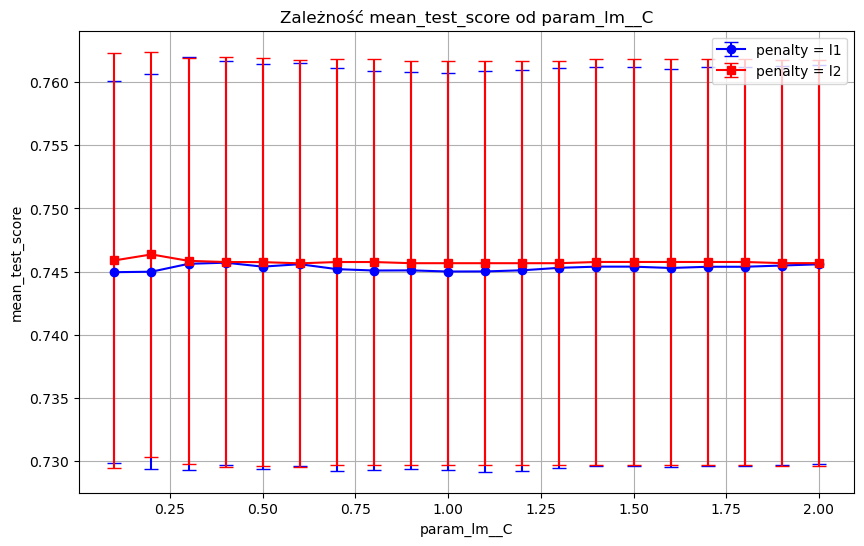

In [381]:
plt.figure(figsize=(10, 6))

plt.errorbar(LM_L1_CV_results['param_lm__C'], 
             LM_L1_CV_results['mean_test_score'], 
             yerr=LM_L1_CV_results['std_test_score'], 
             fmt='o-', 
             capsize=5, 
             label='penalty = l1', 
             color='b')


plt.errorbar(LM_L2_CV_results['param_lm__C'], 
             LM_L2_CV_results['mean_test_score'], 
             yerr=LM_L2_CV_results['std_test_score'], 
             fmt='s-', 
             capsize=5, 
             label='penalty = l2', 
             color='r')

plt.title('Zależność mean_test_score od param_lm__C')
plt.xlabel('param_lm__C')
plt.ylabel('mean_test_score')
plt.grid(True)
plt.legend()

In [383]:
grid_search.best_params_

{'lm__C': 0.2, 'lm__penalty': 'l2'}

In [346]:
#predicions = grid_search.predict_proba(X_test)[:,1]
#predicions

array([0.1711583 , 0.46628088, 0.60936074, ..., 0.65948396, 0.81534997,
       0.85557387])

In [347]:
#np.savetxt("predd.txt", predicions, fmt="%.13f", delimiter=",")

Najlepsze parametry to regularyzacja L2 z C = 0.2.

#### 2.2. SVM

In [363]:
cv = KFold(n_splits=5, shuffle=True, random_state=47)
lasso_cv = LassoCV(cv= cv)

pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', PowerTransformer()),
    ('selector', SelectFromModel(lasso_cv, prefit=False)),
    ('svm', SVC())  
])

# Rozważam różne wartości parametru C z przediału (0.05, 1.5)
params = {
    'svm__C': np.arange(0.05, 1.5, 0.1)   
}

repeated_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=47)

grid_search = GridSearchCV(
    pipeline,
    param_grid=params,
    cv=repeated_cv,
    scoring='balanced_accuracy'
)

In [364]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=47),
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', PowerTransformer()),
                                       ('selector',
                                        SelectFromModel(estimator=LassoCV(cv=KFold(n_splits=5, random_state=47, shuffle=True)))),
                                       ('svm', SVC())]),
             param_grid={'svm__C': array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15, 1.25, 1.35, 1.45])},
             scoring='balanced_accuracy')

In [365]:
SVM_CV_results = pd.DataFrame(grid_search.cv_results_)

In [368]:
grid_search.best_params_

{'svm__C': 0.35000000000000003}

Najlepszy wynik model osiągnął dla wartości C = 0.35

#### 2.3. KNN

In [370]:
cv = KFold(n_splits=5, shuffle=True, random_state=47)
lasso_cv = LassoCV(cv= cv)

pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', PowerTransformer()),
    ('selector', SelectFromModel(lasso_cv, prefit=False)),
    ('knn', KNeighborsClassifier()) 
])
# Rozważam różne wartości parametru n_neighbors oraz metric
params = {
    'knn__n_neighbors': np.arange(1, 21, 1), 
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'], 
}

repeated_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=47)

grid_search = GridSearchCV(
    pipeline,
    param_grid=params,
    cv=repeated_cv,
    scoring='balanced_accuracy'
)

In [371]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=47),
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', PowerTransformer()),
                                       ('selector',
                                        SelectFromModel(estimator=LassoCV(cv=KFold(n_splits=5, random_state=47, shuffle=True)))),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='balanced_accuracy')

In [372]:
KNN_CV_results = pd.DataFrame(grid_search.cv_results_)

In [375]:
grid_search.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 20}

Najlepszy wynik model osiągnął dla n_neighbors = 20.

#### 2.4. Random Forest

In [384]:
pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', PowerTransformer()),
    ('rf', RandomForestClassifier(random_state=47))  
])

# Rozważam różne wartości parametru n_estimators, max_depth oraz min_samples_split
params = {
    'rf__n_estimators': np.arange(100, 500, 50), 
    'rf__max_depth': [None, 10, 15, 20], 
    'rf__min_samples_split': [6, 8, 10] 
}

repeated_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=47)

grid_search = GridSearchCV(
    pipeline,
    param_grid =params,
    cv = repeated_cv,
    scoring='balanced_accuracy'
)

In [385]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=47),
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', PowerTransformer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=47))]),
             param_grid={'rf__max_depth': [None, 10, 15, 20],
                         'rf__min_samples_split': [6, 8, 10],
                         'rf__n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
             scoring='balanced_accuracy')

In [386]:
grid_search.best_params_

{'rf__max_depth': 15, 'rf__min_samples_split': 10, 'rf__n_estimators': 450}

In [394]:
RF_CV_results = pd.DataFrame(grid_search.cv_results_)

In [391]:
# predicions = grid_search.predict_proba(X_test)[:,1]
# predicions

array([0.13372225, 0.30439663, 0.5677283 , ..., 0.60523834, 0.79212332,
       0.94401985])

In [392]:
#np.savetxt("predd.txt", predicions, fmt="%.13f", delimiter=",")

Najlepszy wynik model osiągnął dla n_estimators = 450, max_depth = 15, min_samples_split = 10

#### 2.5. Gradient Boosting

W tym przypadku ze względu na długi czas obliczeń wykonałem kroswalidację tylko jednokrotnie.

In [148]:
pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', PowerTransformer()),
    ('gb', GradientBoostingClassifier(random_state=47))  
])

# Rozważam różne wartości parametrów n_estimators oraz learning_rate
params = {
    'gb__n_estimators': np.arange(40, 220, 20),
    'gb__learning_rate': [0.02, 0.05, 0.1, 0.15, 0.2],
}

#repeated_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=47)
cv = KFold(n_splits=5, shuffle = True, random_state= 47)

grid_search = GridSearchCV(
    pipeline,
    param_grid=params,
    cv= cv,
    scoring='balanced_accuracy'
)

In [49]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=47, shuffle=True),
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', PowerTransformer()),
                                       ('gb',
                                        GradientBoostingClassifier(random_state=47))]),
             param_grid={'gb__learning_rate': [0.02, 0.05, 0.1, 0.15, 0.2],
                         'gb__n_estimators': array([ 40,  60,  80, 100, 120, 140, 160, 180, 200])},
             scoring='balanced_accuracy')

In [53]:
grid_search.best_params_

{'gb__learning_rate': 0.02, 'gb__n_estimators': 200}

Najlepsze parametry to learning_rate = 0.02 oraz n_estimators = 200.

#### 2.6. Extra trees

In [59]:
pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', PowerTransformer()),
    ('et', ExtraTreesClassifier(random_state=47))  # Użycie ExtraTreesClassifier
])

# Rozważam różne wartości parametrów n_estimators, max_depth oraz min_samples_split
params = {
    'et__n_estimators': np.arange(100, 500, 50), 
    'et__max_depth': [None, 10, 15, 20],  
    'et__min_samples_split': [6, 8, 10],  
}

repeated_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=47)

grid_search = GridSearchCV(
    pipeline,
    param_grid=params,
    cv=repeated_cv,
    scoring='balanced_accuracy'
)

In [60]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=47),
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', PowerTransformer()),
                                       ('et',
                                        ExtraTreesClassifier(random_state=47))]),
             param_grid={'et__max_depth': [None, 10, 15, 20],
                         'et__min_samples_split': [6, 8, 10],
                         'et__n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
             scoring='balanced_accuracy')

In [61]:
grid_search.best_params_

{'et__max_depth': 10, 'et__min_samples_split': 8, 'et__n_estimators': 100}

In [63]:
ET_CV_results = pd.DataFrame(grid_search.cv_results_)

Najlepsze parametry to max_depth = 10, min_samples_split = 8 oraz n_estimators = 100.

#### 2.7. Bagging modeli KNN

In [75]:
pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', PowerTransformer()),
    ('bagging', BaggingClassifier(estimator = KNeighborsClassifier(), random_state=47))  
])

# Rozważam różne wartośći n_estimators - czyli liczbę modeli KNN oraz parametr n_neighors dla modelu KNN
params = {
    'bagging__n_estimators': np.arange(10, 200, 20),
    'bagging__estimator__n_neighbors': [5, 10, 20]
}

# Repeated K-Fold Cross Validation
repeated_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=47)

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=params,
    cv=repeated_cv,
    scoring='balanced_accuracy'
)

In [76]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=47),
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', PowerTransformer()),
                                       ('bagging',
                                        BaggingClassifier(estimator=KNeighborsClassifier(),
                                                          random_state=47))]),
             param_grid={'bagging__estimator__n_neighbors': [5, 10, 20],
                         'bagging__n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])},
             scoring='balanced_accuracy')

In [77]:
grid_search.best_params_

{'bagging__estimator__n_neighbors': 20, 'bagging__n_estimators': 110}

In [78]:
BaggingKNN_CV_results = pd.DataFrame(grid_search.cv_results_)

Najlepsze parametry to n_estimators = 110, oraz n_neighbors = 20 (dla pojedyńczego modelu KNN wartość n_neighbors = 20 także okazała się najskuteczniejsza).

## 3. Ocena jakości modeli i wybór ostatecznego modelu
-------------------------- 

W tym kroku przystąpiłem do oceny jakości modeli. Oprócz modeli z parametrami dobranymi w części 2. (czyli regresja liniowa, SVM, KNN, Random Forest, Gradient Boosting, Extra trees, Bagging), sprawdziłem też dodatkowo modele niewymagające doboru hiperparametrów, czyli LDA i NaiveBayes (zrezygnowałem z QDA ze względu na mało obiecujące wyniki w części 1.).

In [80]:
cv = KFold(n_splits=5, shuffle=True, random_state=47)
lasso_cv = LassoCV(cv = cv)

models = [
    ('LogisticRegression', Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),
        ('selector', SelectFromModel(lasso_cv, prefit = False)),
        ('model', LogisticRegression(penalty='l2', C= 0.2, solver='liblinear', max_iter=10000, random_state=47))
    ])),
    ('SVC', Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),
        ('selector', SelectFromModel(lasso_cv, prefit = False)),
        ('model', SVC(C= 0.35, random_state=47))
    ])),
    ('LDA', Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),
        ('selector', SelectFromModel(lasso_cv, prefit = False)),
        ('model', LinearDiscriminantAnalysis())
    ])),
    ('NaiveBayes', Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),
        ('selector', SelectFromModel(lasso_cv, prefit = False)),
        ('model', BernoulliNB())
    ])),
    ('KNN', Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),
        ('selector', SelectFromModel(lasso_cv, prefit = False)),
        ('model', KNeighborsClassifier(n_neighbors = 20))
    ])),
    ('RandomForest', Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),  
        ('model', RandomForestClassifier(n_estimators= 450, max_depth=15, min_samples_split= 10, random_state=47))
    ])),
    ('GradientBoosting', Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),  
        ('model', GradientBoostingClassifier(n_estimators= 200, learning_rate= 0.02, random_state=47))
    ])),
    ('ExtraTrees', Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),  
        ('model', ExtraTreesClassifier(n_estimators= 100, max_depth= 10, min_samples_split= 8, random_state=47))
    ])),
    ('BaggingKNN', Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),  
        ('model', BaggingClassifier(estimator= KNeighborsClassifier(n_neighbors= 20), n_estimators= 110, random_state=47))
    ]))
]

Do oceny jakości modeli zastosowałem trzykrotną kroswalidację na 5 foldach.

In [108]:
repeated_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=47)
results = {}
for name, pipeline in models:
    scores = cross_val_score(pipeline, X_train, y_train, cv= repeated_cv, scoring='balanced_accuracy')
    results[name] = scores

for name, scores in results.items():
    print(f"{name}: balanced accuracy = {scores.mean():.4f}, std = {scores.std():.4f}")

LogisticRegression: balanced accuracy = 0.7464, std = 0.0161
SVC: balanced accuracy = 0.7377, std = 0.0142
LDA: balanced accuracy = 0.7459, std = 0.0158
NaiveBayes: balanced accuracy = 0.7188, std = 0.0128
KNN: balanced accuracy = 0.7223, std = 0.0129
RandomForest: balanced accuracy = 0.7342, std = 0.0147
GradientBoosting: balanced accuracy = 0.7309, std = 0.0136
ExtraTrees: balanced accuracy = 0.7322, std = 0.0127
BaggingKNN: balanced accuracy = 0.7211, std = 0.0162


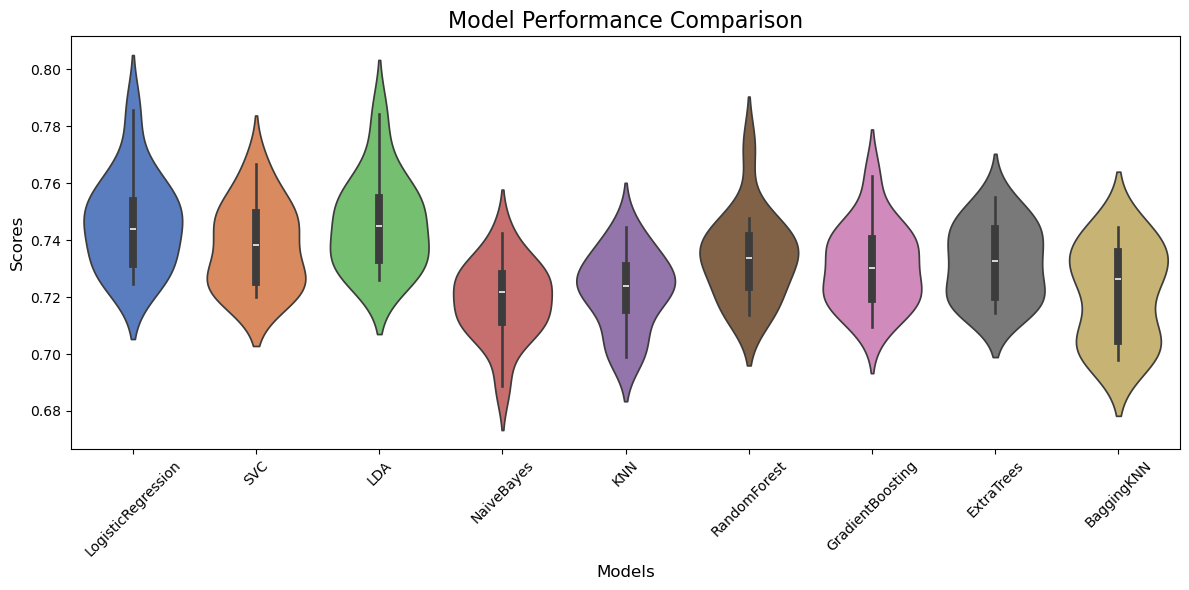

In [151]:
plt.figure(figsize=(12, 6))
sns.violinplot(data= results, palette="muted")
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Scores", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Najskuteczniejsza okazała się regresja liniowa z regularyzacją. Podobny wynik osiągnęła metoda LDA. Nieco gorszy wynik osiągnęła metoda SVM oraz RandomForest.

W dalszej części próbowałem poprawić jakość predykcji stosując metody `StackingClassifier` oraz `VotingClassifier` dla różnych kombinacji powyższych modeli. Jednak w żadnym przypadku nie udało mi się zbliżyć do wyników regresji liniowej oraz LDA.

In [104]:
base_models = [
    ('LogisticRegression', Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),
        ('selector', SelectFromModel(lasso_cv, prefit = False)),
        ('model', LogisticRegression(penalty='l2', C= 0.2, solver='liblinear', max_iter=10000, random_state=47))
    ])),
    ('LDA', Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),
        ('selector', SelectFromModel(lasso_cv, prefit = False)),
        ('model', LinearDiscriminantAnalysis())
    ])),
    ('RandomForest', Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),  
        ('model', RandomForestClassifier(n_estimators= 450, max_depth=15, min_samples_split= 10, random_state=47))
    ])),
]

voting_clf = VotingClassifier(
    estimators = base_models,
    voting= 'soft'
)

In [105]:
repeated_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=47)
scores = cross_val_score(voting_clf, X_train, y_train, cv=repeated_cv, scoring='balanced_accuracy')

print(f"VotingClassifier: balanced accuracy = {scores.mean():.4f}, std = {scores.std():.4f}")

VotingClassifier: balanced accuracy = 0.7403, std = 0.0145


### 3.1. Ostateczny wybór modelu

Przy ostatecznym wyborze modelu brałem pod uwagę regresję liniową oraz LDA. Obie metody osiągnęły bardzo zbliżoną wartość średniego `balanced_accuracy` po kroswalidacji, z podobnym odchyleniem standardowym. 

Ostateczny wybór padł na regresję liniową, ponieważ wyniki regresji liniowej zdają się być bardziej skoncentrowane w górnej części wykresu w porównaniu z LDA.

In [207]:
cv = KFold(n_splits=5, shuffle=True, random_state=47)
lasso_cv = LassoCV(cv = cv)

final_model = Pipeline([
        ('imputation', SimpleImputer(strategy='median')),
        ('scaler', PowerTransformer()),
        ('selector', SelectFromModel(lasso_cv, prefit = False)),
        ('lm', LogisticRegression(penalty='l2', C= 0.2, solver='liblinear', max_iter=10000))
    ])

In [208]:
final_model.fit(X_train, y_train)

Pipeline(steps=[('imputation', SimpleImputer(strategy='median')),
                ('scaler', PowerTransformer()),
                ('selector',
                 SelectFromModel(estimator=LassoCV(cv=KFold(n_splits=5, random_state=47, shuffle=True)))),
                ('lm',
                 LogisticRegression(C=0.2, max_iter=10000,
                                    solver='liblinear'))])

In [211]:
final_model.score(X_train, y_train)

0.7515257192676548

In [212]:
predicions = final_model.predict_proba(X_test)[:,1]
predicions

array([0.1711583 , 0.46628088, 0.60936074, ..., 0.65948396, 0.81534997,
       0.85557387])

In [214]:
np.savetxt("predictions.txt", predicions, fmt="%.14f", delimiter=",")